In [234]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [235]:
TRAIN_DATASET_PATH = '../housing_train.csv'

In [236]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [237]:
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,housing_median_age_nan,...,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,cluster_0,cluster_1,cluster_2,cluster_3,distance_to_center
19643,-0.761876,1.780690,-0.277580,-0.558535,-0.459884,-0.520194,-0.446533,-1.347359,78100.0,-0.189052,...,-0.881005,1.419955,-0.015954,-0.344644,-0.376027,0,1,0,0,1.718350
19644,-0.821707,1.785341,-0.847832,-1.272744,-1.272652,-0.952612,-1.009940,-0.712873,77100.0,-0.189052,...,-0.881005,1.419955,-0.015954,-0.344644,-0.376027,0,1,0,0,1.744877
19645,-0.826693,1.757433,-0.929296,-0.123960,-0.057128,-0.237222,-0.177871,-1.258410,92300.0,-0.189052,...,-0.881005,1.419955,-0.015954,-0.344644,-0.376027,0,1,0,0,1.647714
19646,-0.876553,1.757433,-0.847832,-0.414660,-0.332889,-0.612160,-0.396974,-1.151951,84700.0,-0.189052,...,-0.881005,1.419955,-0.015954,-0.344644,-0.376027,0,1,0,0,1.673278
19647,-0.836665,1.729525,-1.010761,0.267822,0.418197,-0.040910,0.075141,-0.819968,89400.0,-0.189052,...,-0.881005,1.419955,-0.015954,-0.344644,-0.376027,0,1,0,0,1.554259


In [238]:
feature_names = df.columns.tolist()
feature_names.remove('median_house_value')

target_name = 'median_house_value'
feature_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'housing_median_age_nan',
 'ocean_proximity_nan',
 'longitude_outlier',
 'latitude_outlier',
 'population_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'distance_to_center']

In [239]:
X = df[feature_names]
y = df[target_name]

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [273]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

R2:	0.622
MAE:	44004.8
MSE:	3557682562.562


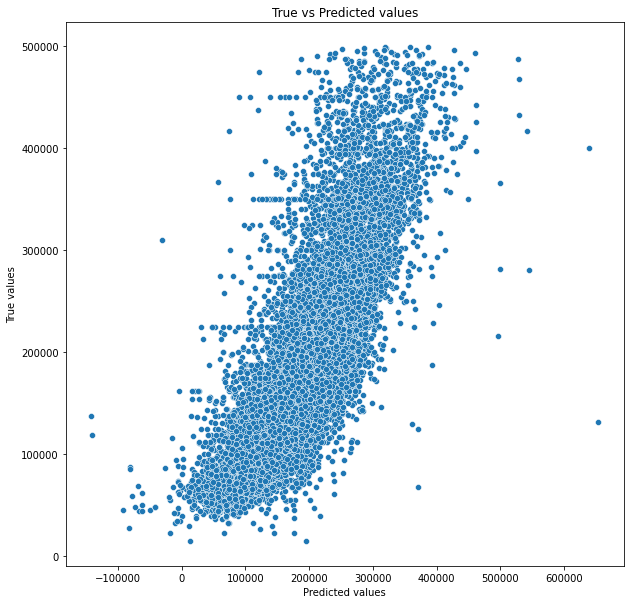

In [242]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.601
MAE:	45392.398
MSE:	3775009673.485


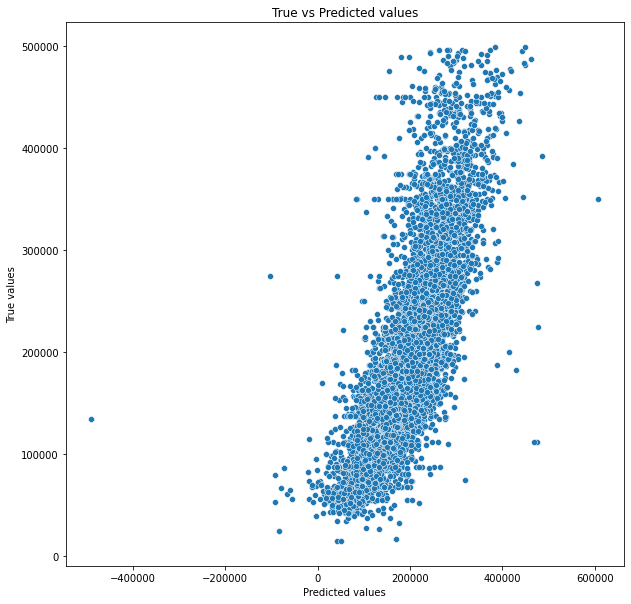

In [243]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [274]:
rf_model = RandomForestRegressor(max_depth=7, n_estimators=400)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=400)

R2:	0.745
MAE:	34972.403
MSE:	2400309485.541


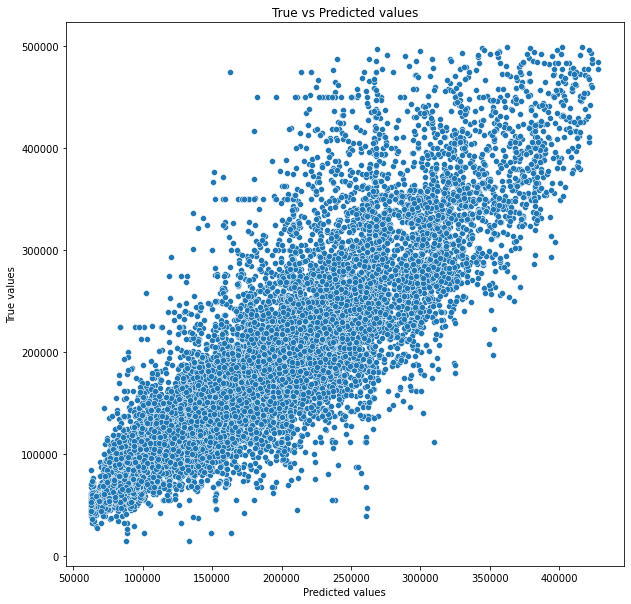

In [275]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.691
MAE:	38113.545
MSE:	2919442901.414


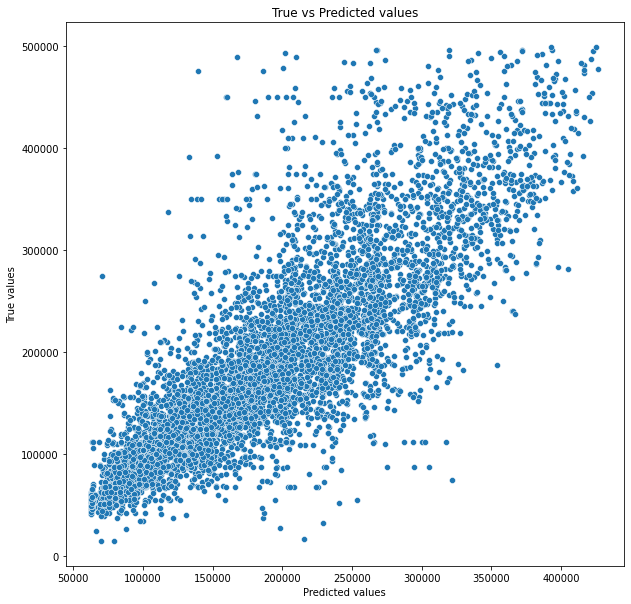

In [276]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [269]:
gb_model = GradientBoostingRegressor(max_depth=6, n_estimators=400)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=400)

R2:	0.957
MAE:	14746.122
MSE:	404339168.038


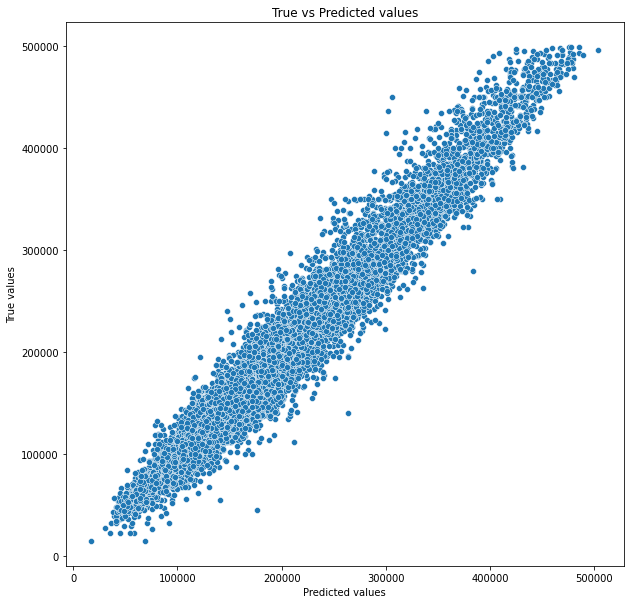

In [270]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.809
MAE:	28361.545
MSE:	1811739440.1


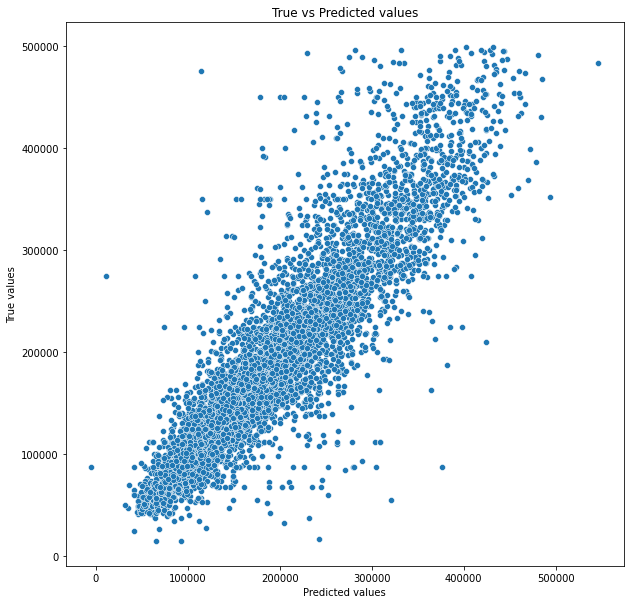

In [271]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)